In [263]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [264]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [266]:
dataset = pd.read_csv("matches3.csv")
col = ['B_Top','B_Mid','B_Jg','B_Bot','B_Sup','R_Top','R_Mid','R_Jg','R_Bot','R_Sup']

In [235]:
dataset

,ID,B_Win,B_Top,B_Top_Kills,B_Top_KDA,B_Jg,B_Jg_Kills,B_Jg_KDA,B_Mid,B_Mid_Kills,...,R_Jg_KDA,R_Mid,R_Mid_Kills,R_Mid_KDA,R_Bot,R_Bot_Kills,R_Bot_KDA,R_Sup,R_Sup_Kills,R_Sup_KDA
0,4254552847,False,Jayce,5.0,1.200000,Ekko,3,1.230769,Veigar,25.0,...,2.875000,Gragas,13.0,1.857143,Jhin,5.0,2.400000,Lux,4.0,2.300000
1,4251572080,True,Aatrox,3.0,1.500000,Jarvan IV,10,21.000000,Akali,4.0,...,1.000000,Karma,3.0,1.666667,Ezreal,6.0,0.875000,Leona,1.0,1.000000
2,4251403578,False,Camille,7.0,1.375000,Master Yi,3,1.142857,Yasuo,2.0,...,8.000000,Katarina,14.0,10.500000,Kai'Sa,7.0,8.500000,Leona,1.0,10.000000
3,4250631950,False,Akali,9.0,2.500000,Kayn,5,1.545455,Cassiopeia,10.0,...,2.333333,Yasuo,17.0,2.888889,Kai'Sa,12.0,4.166667,Yuumi,1.0,5.200000
4,4249706191,True,Singed,4.0,14.000000,Talon,13,4.000000,Ahri,3.0,...,4.666667,Lissandra,1.0,1.500000,Jhin,4.0,0.857143,Nautilus,0.0,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,4249483717,False,Singed,4.0,1.600000,Shyvana,5,1.428571,Sylas,9.0,...,20.000000,Veigar,2.0,2.166667,Xayah,9.0,3.400000,Karma,4.0,2.285714
4469,4249478537,False,Cho'Gath,6.0,2.000000,Shyvana,5,0.727273,Lucian,10.0,...,4.166667,Pyke,25.0,5.666667,Veigar,10.0,3.375000,Pantheon,8.0,3.100000
4470,4249476772,True,Vladimir,3.0,4.000000,Xin Zhao,7,11.000000,Pyke,6.0,...,0.666667,Garen,1.0,0.500000,Vayne,0.0,0.000000,Nami,1.0,0.166667
4471,4248468653,True,Mordekaiser,4.0,4.500000,Lee Sin,8,4.250000,Pyke,8.0,...,1.500000,Lucian,4.0,1.000000,Senna,1.0,0.666667,Thresh,1.0,0.200000


In [236]:
dataset = dataset.drop(['ID'], axis=1)
dataset["B_Win"] = dataset["B_Win"].astype(int)

In [237]:
dataset.head()

,B_Win,B_Top,B_Top_Kills,B_Top_KDA,B_Jg,B_Jg_Kills,B_Jg_KDA,B_Mid,B_Mid_Kills,B_Mid_KDA,...,R_Jg_KDA,R_Mid,R_Mid_Kills,R_Mid_KDA,R_Bot,R_Bot_Kills,R_Bot_KDA,R_Sup,R_Sup_Kills,R_Sup_KDA
0,False,Jayce,5.0,1.200,Ekko,3,1.230769,Veigar,25.0,4.285714,...,2.875000,Gragas,13.0,1.857143,Jhin,5.0,2.400000,Lux,4.0,2.3
1,True,Aatrox,3.0,1.500,Jarvan IV,10,21.000000,Akali,4.0,1.800000,...,1.000000,Karma,3.0,1.666667,Ezreal,6.0,0.875000,Leona,1.0,1.0
2,False,Camille,7.0,1.375,Master Yi,3,1.142857,Yasuo,2.0,0.666667,...,8.000000,Katarina,14.0,10.500000,Kai'Sa,7.0,8.500000,Leona,1.0,10.0
3,False,Akali,9.0,2.500,Kayn,5,1.545455,Cassiopeia,10.0,2.571429,...,2.333333,Yasuo,17.0,2.888889,Kai'Sa,12.0,4.166667,Yuumi,1.0,5.2
4,True,Singed,4.0,14.000,Talon,13,4.000000,Ahri,3.0,3.666667,...,4.666667,Lissandra,1.0,1.500000,Jhin,4.0,0.857143,Nautilus,0.0,0.4


In [240]:
dataset = dataset.dropna()
df2 = dataset[col]
df2

,B_Top,B_Mid,B_Jg,B_Bot,B_Sup,R_Top,R_Mid,R_Jg,R_Bot,R_Sup
0,Jayce,Veigar,Ekko,Tahm Kench,Senna,Akali,Gragas,Talon,Jhin,Lux
1,Aatrox,Akali,Jarvan IV,Aphelios,Soraka,Mordekaiser,Karma,Viego,Ezreal,Leona
2,Camille,Yasuo,Master Yi,Ezreal,Nautilus,Irelia,Katarina,Rammus,Kai'Sa,Leona
3,Akali,Cassiopeia,Kayn,Xayah,Thresh,Fiora,Yasuo,Jarvan IV,Kai'Sa,Yuumi
4,Singed,Ahri,Talon,Ashe,Blitzcrank,Akali,Lissandra,Graves,Jhin,Nautilus
...,...,...,...,...,...,...,...,...,...,...
4468,Singed,Sylas,Shyvana,Jinx,Blitzcrank,Camille,Veigar,Kindred,Xayah,Karma
4469,Cho'Gath,Lucian,Shyvana,Jhin,Shaco,Akshan,Pyke,Volibear,Veigar,Pantheon
4470,Vladimir,Pyke,Xin Zhao,Samira,Renata Glasc,Singed,Garen,Kindred,Vayne,Nami
4471,Mordekaiser,Pyke,Lee Sin,Samira,Morgana,Tryndamere,Lucian,Nunu & Willump,Senna,Thresh


In [243]:
df = pd.get_dummies(df2, columns = df2.columns)
# df = dataset.drop(col, axis=1)
# df = pd.concat([df,one_hot_encoded_data], ignore_index=True)

In [244]:
df.head()

,B_Top_Aatrox,B_Top_Ahri,B_Top_Akali,B_Top_Akshan,B_Top_Alistar,B_Top_Aurelion Sol,B_Top_Azir,B_Top_Caitlyn,B_Top_Camille,B_Top_Cassiopeia,...,R_Sup_Veigar,R_Sup_Vel'Koz,R_Sup_Vex,R_Sup_Xerath,R_Sup_Yuumi,R_Sup_Zac,R_Sup_Ziggs,R_Sup_Zilean,R_Sup_Zoe,R_Sup_Zyra
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
df.iloc[:,1:]

,B_Top_Kills,B_Top_KDA,B_Jg_Kills,B_Jg_KDA,B_Mid_Kills,B_Mid_KDA,B_Sup_Kills,B_Sup_KDA,B_Bot_Kills,B_Bot_KDA,...,R_Sup_Veigar,R_Sup_Vel'Koz,R_Sup_Vex,R_Sup_Xerath,R_Sup_Yuumi,R_Sup_Zac,R_Sup_Ziggs,R_Sup_Zilean,R_Sup_Zoe,R_Sup_Zyra
0,5.0,1.200,3.0,1.230769,25.0,4.285714,8.0,2.166667,3.0,5.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.500,10.0,21.000000,4.0,1.800000,1.0,3.600000,10.0,3.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.0,1.375,3.0,1.142857,2.0,0.666667,1.0,1.000000,4.0,1.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.0,2.500,5.0,1.545455,10.0,2.571429,4.0,3.000000,10.0,3.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,14.000,13.0,4.000000,3.0,3.666667,2.0,5.250000,9.0,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.15, random_state=0)

In [247]:
X_train.shape

(7384, 945)

In [250]:
model_one_hot = keras.Sequential() # create model

model_one_hot.add(layers.Dense(64, input_dim=945, activation='relu')) # Input layer

model_one_hot.add(layers.Dense(1, activation='sigmoid')) # output layer

model_one_hot.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_one_hot.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                60544     
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 60,609
Trainable params: 60,609
Non-trainable params: 0
_________________________________________________________________


In [251]:
fit_model_one_hot = model_one_hot.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50)

Epoch 1/50
231/231 [==============================] - 11s 44ms/step - loss: nan - acc: 0.2454 - val_loss: nan - val_acc: 0.2454
Epoch 2/50
231/231 [==============================] - 1s 6ms/step - loss: nan - acc: 0.2454 - val_loss: nan - val_acc: 0.2454
Epoch 3/50
231/231 [==============================] - 1s 5ms/step - loss: nan - acc: 0.2454 - val_loss: nan - val_acc: 0.2454
Epoch 4/50
231/231 [==============================] - 1s 5ms/step - loss: nan - acc: 0.2454 - val_loss: nan - val_acc: 0.2454
Epoch 5/50
231/231 [==============================] - 1s 5ms/step - loss: nan - acc: 0.2454 - val_loss: nan - val_acc: 0.2454
Epoch 6/50
231/231 [==============================] - 1s 5ms/step - loss: nan - acc: 0.2454 - val_loss: nan - val_acc: 0.2454
Epoch 7/50
231/231 [==============================] - 1s 4ms/step - loss: nan - acc: 0.2454 - val_loss: nan - val_acc: 0.2454
Epoch 8/50
231/231 [==============================] - 1s 5ms/step - loss: nan - acc: 0.2454 - val_loss: nan - val_ac

KeyboardInterrupt: 

In [252]:
dataset

,B_Win,B_Top,B_Top_Kills,B_Top_KDA,B_Jg,B_Jg_Kills,B_Jg_KDA,B_Mid,B_Mid_Kills,B_Mid_KDA,...,R_Jg_KDA,R_Mid,R_Mid_Kills,R_Mid_KDA,R_Bot,R_Bot_Kills,R_Bot_KDA,R_Sup,R_Sup_Kills,R_Sup_KDA
0,0,Jayce,5.0,1.200000,Ekko,3,1.230769,Veigar,25.0,4.285714,...,2.875000,Gragas,13.0,1.857143,Jhin,5.0,2.400000,Lux,4.0,2.300000
1,1,Aatrox,3.0,1.500000,Jarvan IV,10,21.000000,Akali,4.0,1.800000,...,1.000000,Karma,3.0,1.666667,Ezreal,6.0,0.875000,Leona,1.0,1.000000
2,0,Camille,7.0,1.375000,Master Yi,3,1.142857,Yasuo,2.0,0.666667,...,8.000000,Katarina,14.0,10.500000,Kai'Sa,7.0,8.500000,Leona,1.0,10.000000
3,0,Akali,9.0,2.500000,Kayn,5,1.545455,Cassiopeia,10.0,2.571429,...,2.333333,Yasuo,17.0,2.888889,Kai'Sa,12.0,4.166667,Yuumi,1.0,5.200000
4,1,Singed,4.0,14.000000,Talon,13,4.000000,Ahri,3.0,3.666667,...,4.666667,Lissandra,1.0,1.500000,Jhin,4.0,0.857143,Nautilus,0.0,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,0,Singed,4.0,1.600000,Shyvana,5,1.428571,Sylas,9.0,1.666667,...,20.000000,Veigar,2.0,2.166667,Xayah,9.0,3.400000,Karma,4.0,2.285714
4469,0,Cho'Gath,6.0,2.000000,Shyvana,5,0.727273,Lucian,10.0,1.153846,...,4.166667,Pyke,25.0,5.666667,Veigar,10.0,3.375000,Pantheon,8.0,3.100000
4470,1,Vladimir,3.0,4.000000,Xin Zhao,7,11.000000,Pyke,6.0,3.500000,...,0.666667,Garen,1.0,0.500000,Vayne,0.0,0.000000,Nami,1.0,0.166667
4471,1,Mordekaiser,4.0,4.500000,Lee Sin,8,4.250000,Pyke,8.0,8.000000,...,1.500000,Lucian,4.0,1.000000,Senna,1.0,0.666667,Thresh,1.0,0.200000


In [253]:
dataset_categoriical = dataset

In [254]:
for col_name in dataset_categoriical.columns:
        dataset_categoriical[col_name]= dataset_categoriical[col_name].astype('category').cat.codes

In [255]:
col = ['B_Top','B_Mid','B_Jg','B_Bot','B_Sup','R_Top','R_Mid','R_Jg','R_Bot','R_Sup']

dataset_categoriical[col] = dataset_categoriical[col].apply(lambda x: x.astype('category'))

burner = dataset_categoriical.select_dtypes(['category']).columns
dataset_categoriical[burner] = dataset_categoriical[burner].apply(lambda x: x.cat.codes)

In [257]:
dataset_categoriical

,B_Win,B_Top,B_Top_Kills,B_Top_KDA,B_Jg,B_Jg_Kills,B_Jg_KDA,B_Mid,B_Mid_Kills,B_Mid_KDA,...,R_Jg_KDA,R_Mid,R_Mid_Kills,R_Mid_KDA,R_Bot,R_Bot_Kills,R_Bot_KDA,R_Sup,R_Sup_Kills,R_Sup_KDA
0,0,36,5,75,6,3,62,103,25,200,...,148,27,13,112,13,5,131,34,4,129
1,1,0,3,94,16,10,266,2,4,112,...,49,41,3,100,9,6,45,32,1,45
2,0,8,7,86,28,3,56,113,2,36,...,233,44,14,244,15,7,234,32,1,255
3,0,2,9,141,21,5,82,13,10,150,...,122,114,17,159,15,12,184,76,1,214
4,1,89,4,230,55,13,181,1,3,187,...,193,54,1,92,13,4,44,41,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,0,89,4,100,48,5,76,90,9,102,...,264,104,2,128,54,9,165,25,4,128
4469,0,10,6,120,48,5,31,53,10,69,...,182,72,25,217,51,10,164,45,8,164
4470,1,110,3,177,65,7,249,69,6,183,...,29,25,1,25,50,0,0,39,1,3
4471,1,59,4,184,24,8,188,69,8,241,...,78,55,4,61,33,1,31,68,1,4


In [258]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(dataset_categoriical.iloc[:,1:], dataset_categoriical.iloc[:,0], test_size=0.15, random_state=0)

In [262]:
X_train_2.shape

(3692, 30)

In [259]:
model_categorical = keras.Sequential() # create model

model_categorical.add(layers.Dense(150, input_dim=30, activation='relu')) # Input layer

model_categorical.add(layers.Dense(150, activation='relu')) # Input layer

model_categorical.add(layers.Dense(1, activation='sigmoid')) # output layer

model_categorical.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

model_categorical.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 150)               4650      
                                                                 
 dense_34 (Dense)            (None, 150)               22650     
                                                                 
 dense_35 (Dense)            (None, 1)                 151       
                                                                 
Total params: 27,451
Trainable params: 27,451
Non-trainable params: 0
_________________________________________________________________


In [260]:
# validation_data=(X_test, Y_test)
fit_model_categorical = model_categorical.fit(X_train_2, Y_train_2, validation_data=(X_test_2, Y_test_2), epochs=40)

Epoch 1/40
116/116 [==============================] - 1s 5ms/step - loss: 0.9877 - acc: 0.9109 - val_loss: 0.9319 - val_acc: 0.9064
Epoch 2/40
116/116 [==============================] - 0s 4ms/step - loss: 0.4622 - acc: 0.9285 - val_loss: 0.4086 - val_acc: 0.9018
Epoch 3/40
116/116 [==============================] - 0s 4ms/step - loss: 0.2892 - acc: 0.9277 - val_loss: 0.4654 - val_acc: 0.8865
Epoch 4/40
116/116 [==============================] - 0s 4ms/step - loss: 0.2849 - acc: 0.9271 - val_loss: 0.3769 - val_acc: 0.9095
Epoch 5/40
116/116 [==============================] - 0s 4ms/step - loss: 0.2544 - acc: 0.9312 - val_loss: 0.4309 - val_acc: 0.8880
Epoch 6/40
116/116 [==============================] - 0s 4ms/step - loss: 0.1920 - acc: 0.9369 - val_loss: 0.3562 - val_acc: 0.8880
Epoch 7/40
116/116 [==============================] - 1s 5ms/step - loss: 0.1462 - acc: 0.9488 - val_loss: 0.3911 - val_acc: 0.8880
Epoch 8/40
116/116 [==============================] - 1s 5ms/step - loss: 0.

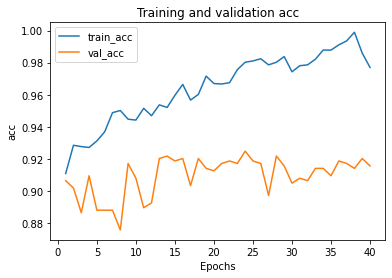

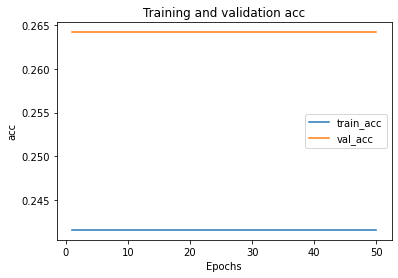

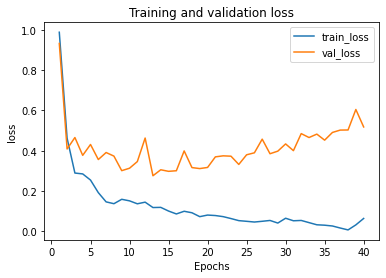

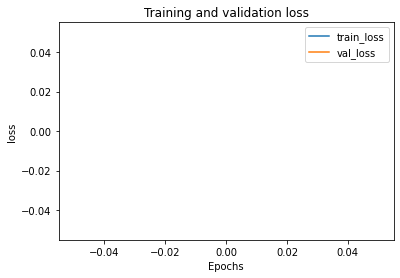

In [261]:
plot_metric(fit_model_categorical,'acc')
plot_metric(fit_model_one_hot,'acc')
plot_metric(fit_model_categorical,'loss')
plot_metric(fit_model_one_hot,'loss')